# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [395]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=pd.merge(study_results,mouse_metadata,on='Mouse ID').sort_values('Timepoint',ascending=True)

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1460,w584,0,45.0,0,Infubinol,Male,3,29
1006,p136,0,45.0,0,Zoniferol,Female,5,28
461,a411,0,45.0,0,Ramicane,Male,3,22
1467,b447,0,45.0,0,Ceftamin,Male,2,30


In [89]:
# Checking the number of mice.
mice_count=len(combined_df['Mouse ID'].unique())
mice_count

249

In [365]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_timepoint_df = combined_df[combined_df.duplicated(['Mouse ID','Timepoint'])]
mice_timepoint_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [91]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df['Mouse ID']=='g989',:]
duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26


In [92]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_dropped=combined_df[(combined_df['Mouse ID']!='g989')].sort_values('Timepoint',ascending=True)
df_dropped.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
766,k862,0,45.0,0,Stelasyn,Female,13,25
1745,u364,0,45.0,0,Capomulin,Male,18,17
68,z234,0,45.0,0,Naftisol,Female,19,27
776,g867,0,45.0,0,Stelasyn,Female,9,25


In [93]:
# Checking the number of mice in the clean DataFrame.
mice_count_2=len(df_dropped['Mouse ID'].unique())
mice_count_2

248

## Summary Statistics

In [109]:
#Identify all the treatments used in the study
df_dropped['Drug Regimen'].unique()

array(['Capomulin', 'Stelasyn', 'Naftisol', 'Ketapril', 'Ramicane',
       'Ceftamin', 'Placebo', 'Infubinol', 'Zoniferol', 'Propriva'],
      dtype=object)

In [111]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_capomulin=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Capomulin')]['Tumor Volume (mm3)'])
median_capomulin=np.median(df_dropped[(df_dropped['Drug Regimen']=='Capomulin')]['Tumor Volume (mm3)'])
var_capomulin=np.var(df_dropped[(df_dropped['Drug Regimen']=='Capomulin')]['Tumor Volume (mm3)'],ddof = 1)
sd_capomulin=np.std(df_dropped[(df_dropped['Drug Regimen']=='Capomulin')]['Tumor Volume (mm3)'],ddof = 1)
sem_capomulin=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Capomulin')]['Tumor Volume (mm3)'])

mean_ceftamin=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Ceftamin')]['Tumor Volume (mm3)'])
median_ceftamin=np.median(df_dropped[(df_dropped['Drug Regimen']=='Ceftamin')]['Tumor Volume (mm3)'])
var_ceftamin=np.var(df_dropped[(df_dropped['Drug Regimen']=='Ceftamin')]['Tumor Volume (mm3)'],ddof = 1)
sd_ceftamin=np.std(df_dropped[(df_dropped['Drug Regimen']=='Ceftamin')]['Tumor Volume (mm3)'],ddof = 1)
sem_ceftamin=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Ceftamin')]['Tumor Volume (mm3)'])

mean_infubinol=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Infubinol')]['Tumor Volume (mm3)'])
median_infubinol=np.median(df_dropped[(df_dropped['Drug Regimen']=='Infubinol')]['Tumor Volume (mm3)'])
var_infubinol=np.var(df_dropped[(df_dropped['Drug Regimen']=='Infubinol')]['Tumor Volume (mm3)'],ddof = 1)
sd_infubinol=np.std(df_dropped[(df_dropped['Drug Regimen']=='Infubinol')]['Tumor Volume (mm3)'],ddof = 1)
sem_infubinol=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Infubinol')]['Tumor Volume (mm3)'])

mean_ketapril=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Ketapril')]['Tumor Volume (mm3)'])
median_ketapril=np.median(df_dropped[(df_dropped['Drug Regimen']=='Ketapril')]['Tumor Volume (mm3)'])
var_ketapril=np.var(df_dropped[(df_dropped['Drug Regimen']=='Ketapril')]['Tumor Volume (mm3)'],ddof = 1)
sd_ketapril=np.std(df_dropped[(df_dropped['Drug Regimen']=='Ketapril')]['Tumor Volume (mm3)'],ddof = 1)
sem_ketapril=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Ketapril')]['Tumor Volume (mm3)'])

mean_naftisol=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Naftisol')]['Tumor Volume (mm3)'])
median_naftisol=np.median(df_dropped[(df_dropped['Drug Regimen']=='Naftisol')]['Tumor Volume (mm3)'])
var_naftisol=np.var(df_dropped[(df_dropped['Drug Regimen']=='Naftisol')]['Tumor Volume (mm3)'],ddof = 1)
sd_naftisol=np.std(df_dropped[(df_dropped['Drug Regimen']=='Naftisol')]['Tumor Volume (mm3)'],ddof = 1)
sem_naftisol=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Naftisol')]['Tumor Volume (mm3)'])

mean_placebo=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Placebo')]['Tumor Volume (mm3)'])
median_placebo=np.median(df_dropped[(df_dropped['Drug Regimen']=='Placebo')]['Tumor Volume (mm3)'])
var_placebo=np.var(df_dropped[(df_dropped['Drug Regimen']=='Placebo')]['Tumor Volume (mm3)'],ddof = 1)
sd_placebo=np.std(df_dropped[(df_dropped['Drug Regimen']=='Placebo')]['Tumor Volume (mm3)'],ddof = 1)
sem_placebo=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Placebo')]['Tumor Volume (mm3)'])

mean_propriva=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Propriva')]['Tumor Volume (mm3)'])
median_propriva=np.median(df_dropped[(df_dropped['Drug Regimen']=='Propriva')]['Tumor Volume (mm3)'])
var_propriva=np.var(df_dropped[(df_dropped['Drug Regimen']=='Propriva')]['Tumor Volume (mm3)'],ddof = 1)
sd_propriva=np.std(df_dropped[(df_dropped['Drug Regimen']=='Propriva')]['Tumor Volume (mm3)'],ddof = 1)
sem_propriva=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Propriva')]['Tumor Volume (mm3)'])

mean_ramicane=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Ramicane')]['Tumor Volume (mm3)'])
median_ramicane=np.median(df_dropped[(df_dropped['Drug Regimen']=='Ramicane')]['Tumor Volume (mm3)'])
var_ramicane=np.var(df_dropped[(df_dropped['Drug Regimen']=='Ramicane')]['Tumor Volume (mm3)'],ddof = 1)
sd_ramicane=np.std(df_dropped[(df_dropped['Drug Regimen']=='Ramicane')]['Tumor Volume (mm3)'],ddof = 1)
sem_ramicane=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Ramicane')]['Tumor Volume (mm3)'])

mean_stelasyn=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Stelasyn')]['Tumor Volume (mm3)'])
median_stelasyn=np.median(df_dropped[(df_dropped['Drug Regimen']=='Stelasyn')]['Tumor Volume (mm3)'])
var_stelasyn=np.var(df_dropped[(df_dropped['Drug Regimen']=='Stelasyn')]['Tumor Volume (mm3)'],ddof = 1)
sd_stelasyn=np.std(df_dropped[(df_dropped['Drug Regimen']=='Stelasyn')]['Tumor Volume (mm3)'],ddof = 1)
sem_stelasyn=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Stelasyn')]['Tumor Volume (mm3)'])

mean_zoniferol=np.mean(df_dropped[(df_dropped['Drug Regimen']=='Zoniferol')]['Tumor Volume (mm3)'])
median_zoniferol=np.median(df_dropped[(df_dropped['Drug Regimen']=='Zoniferol')]['Tumor Volume (mm3)'])
var_zoniferol=np.var(df_dropped[(df_dropped['Drug Regimen']=='Zoniferol')]['Tumor Volume (mm3)'],ddof = 1)
sd_zoniferol=np.std(df_dropped[(df_dropped['Drug Regimen']=='Zoniferol')]['Tumor Volume (mm3)'],ddof = 1)
sem_zoniferol=st.sem(df_dropped[(df_dropped['Drug Regimen']=='Zoniferol')]['Tumor Volume (mm3)'])

sum_stat_df = pd.DataFrame({'Drug Regime':['Capomulin','Stelasyn','Naftisol','Ketapril','Ramicane','Ceftamin','Placebo','Infubinol','Zoniferol','Propriva'],
                            'Mean Tumor Volume':[mean_capomulin,mean_stelasyn,mean_naftisol,mean_ketapril,mean_ramicane,mean_ceftamin,mean_placebo,mean_infubinol,mean_zoniferol,mean_propriva],
                            'Median Tumor Volume':[median_capomulin,median_stelasyn,median_naftisol,median_ketapril,median_ramicane,median_ceftamin,median_placebo,median_infubinol,median_zoniferol,median_propriva],
                            'Tumor Volume Variance':[var_capomulin,var_stelasyn,var_naftisol,var_ketapril,var_ramicane,var_ceftamin,var_placebo,var_infubinol,var_zoniferol,var_propriva],
                            'Tumor Volume Std. Dev.':[sd_capomulin,sd_stelasyn,sd_naftisol,sd_ketapril,sd_ramicane,sd_ceftamin,sd_placebo,sd_infubinol,sd_zoniferol,sd_propriva],
                            'Tumor Volume Std. Err.':[sem_capomulin,sem_stelasyn,sem_naftisol,sem_ketapril,sem_ramicane,sem_ceftamin,sem_placebo,sem_infubinol,sem_zoniferol,sem_propriva]})

sum_stat_df


,Drug Regime,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
2,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
5,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
6,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
7,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
8,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
9,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [154]:
df1=df_dropped.groupby('Drug Regimen')
df2 = pd.DataFrame(df1['Mouse ID'].count()).reset_index().sort_values('Mouse ID',ascending=False)
df2


,Drug Regimen,Mouse ID
0,Capomulin,230
7,Ramicane,228
3,Ketapril,188
4,Naftisol,186
9,Zoniferol,182
5,Placebo,181
8,Stelasyn,181
1,Ceftamin,178
2,Infubinol,178
6,Propriva,148


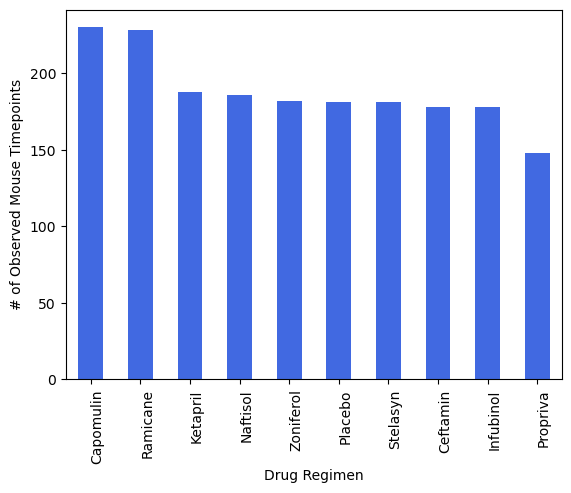

In [204]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart=df2.plot(kind='bar',facecolor='royalblue',alpha=1,xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints",legend=False)
xticklabels = df2["Drug Regimen"]
bar_chart.set_xticklabels(xticklabels, rotation=90, rotation_mode='anchor', ha='right')
plt.show()

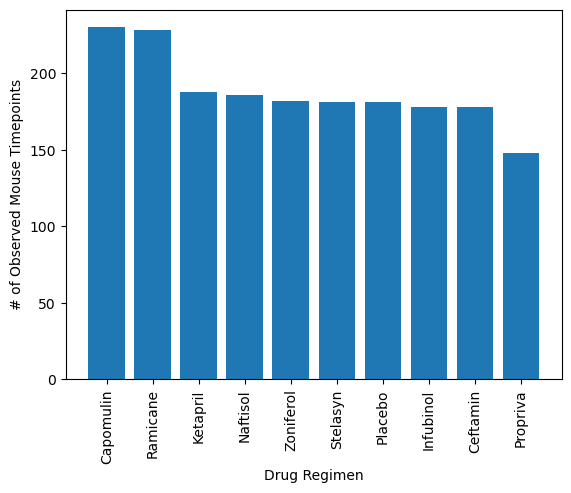

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(df2))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, df2["Mouse ID"], color='b', alpha=0.7, align="center")
plt.xticks(tick_locations,df2["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [181]:
df3=df_dropped.groupby('Sex')
df4 = pd.DataFrame(df3['Mouse ID'].count()).reset_index().sort_values('Mouse ID',ascending=False)
df4



,Sex,Mouse ID
1,Male,958
0,Female,922


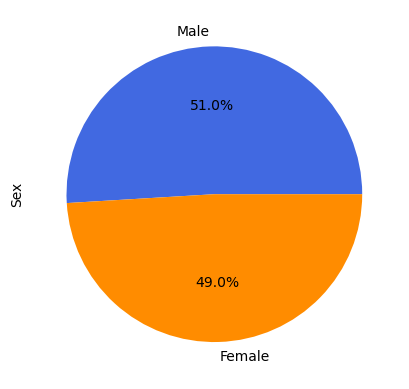

In [219]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart=df4['Mouse ID'].plot(kind='pie',ylabel='Sex',labels=df4['Sex'],colors=['royalblue','darkorange'],autopct="%1.1f%%")
plt.show()

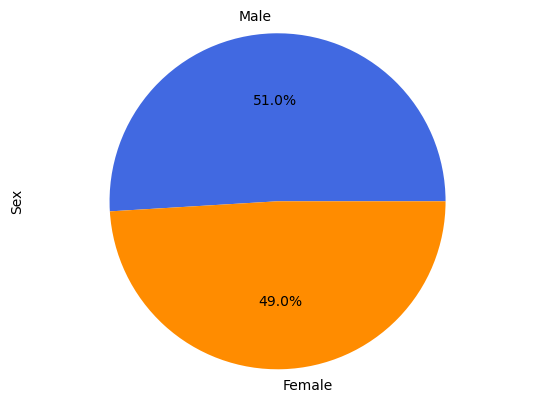

In [197]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df4['Mouse ID'], labels=df4['Sex'],colors=['royalblue','darkorange'],autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [244]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
df5=df_dropped.groupby('Mouse ID')
df6 = pd.DataFrame(df5['Timepoint'].unique()).reset_index()
df6

df6['last_timepoint']=df6['Timepoint'].apply(lambda x:x[-1])
df6

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df=pd.merge(df6,df_dropped,on='Mouse ID')
cleaned_df=merged_df.loc[merged_df['last_timepoint']==merged_df['Timepoint_y'],:]
cleaned_df


,Mouse ID,Timepoint_x,last_timepoint,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,a203,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]",45,45,67.973419,2,Infubinol,Female,20,23
19,a251,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]",45,45,65.525743,1,Infubinol,Female,21,25
29,a262,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]",45,45,70.717621,4,Placebo,Female,17,29
39,a275,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]",45,45,62.999356,3,Ceftamin,Female,20,28
46,a366,"[0, 5, 10, 15, 20, 25, 30]",30,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...,...,...
1839,z435,"[0, 5, 10]",10,10,48.710661,0,Propriva,Female,12,26
1849,z578,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]",45,45,30.638696,0,Ramicane,Male,11,16
1859,z581,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]",45,45,62.754451,3,Infubinol,Female,24,25
1869,z795,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]",45,45,65.741070,3,Naftisol,Female,13,29


In [330]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumor_volume=[]
ramicane_tumor_volume=[]
infubinol_tumor_volume=[]
ceftamin_tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = cleaned_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
# Locate the rows which contain mice on each drug and get the tumor volumes
capomulin_tumor_volume = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'].values
ramicane_tumor_volume = cleaned_df.loc[cleaned_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)'].values
infubinol_tumor_volume = cleaned_df.loc[cleaned_df['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'].values
ceftamin_tumor_volume = cleaned_df.loc[cleaned_df['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)'].values
    
    # add subset 

    
    # Determine outliers using upper and lower bounds

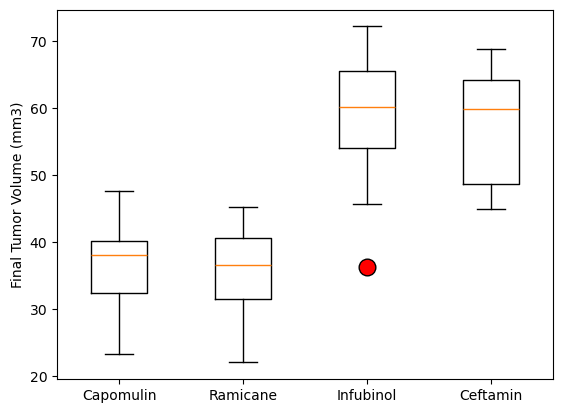

In [343]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
my_dict ={'Capomulin':capomulin_tumor_volume,'Ramicane':ramicane_tumor_volume,'Infubinol':infubinol_tumor_volume,'Ceftamin':ceftamin_tumor_volume}
plt.boxplot(my_dict.values(), labels=my_dict.keys(),flierprops={'marker': 'o', 'markerfacecolor': 'red','markersize': 12})
plt.gca().set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

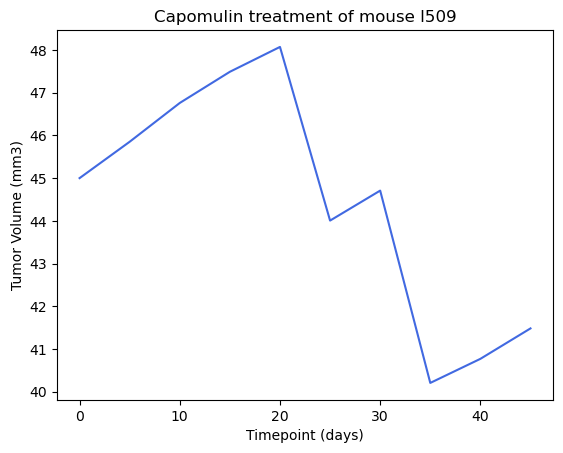

In [387]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_df=merged_df.loc[merged_df['Mouse ID']=='l509']
plt.plot(l509_df["Timepoint_y"],l509_df["Tumor Volume (mm3)"],color = "royalblue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.gca().set_ylabel('Tumor Volume (mm3)')
plt.show()



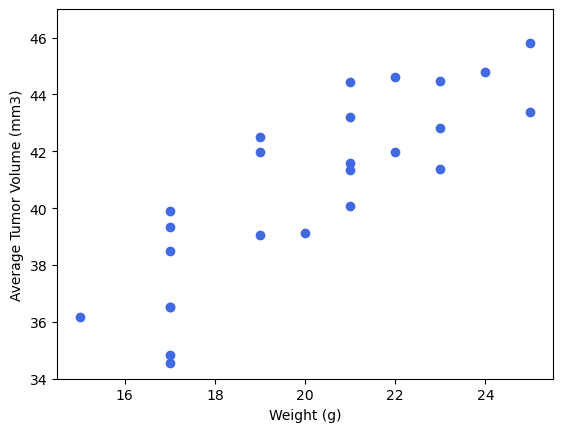

In [388]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
scatter_df=merged_df.loc[merged_df['Drug Regimen']=='Capomulin'].groupby('Mouse ID')
scatter_mean=scatter_df['Tumor Volume (mm3)'].mean()
weight=scatter_df['Weight (g)'].unique()

plt.scatter(weight, scatter_mean, marker="o", facecolors="royalblue", edgecolors="royalblue")
plt.ylim(34,47)
plt.xlabel("Weight (g)")
plt.gca().set_ylabel('Average Tumor Volume (mm3)')
plt.show()




## Correlation and Regression

In [412]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(weight,scatter_mean)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0][0],2)}")


The correlation between mouse weight and the average tumor volume is 0.84


Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

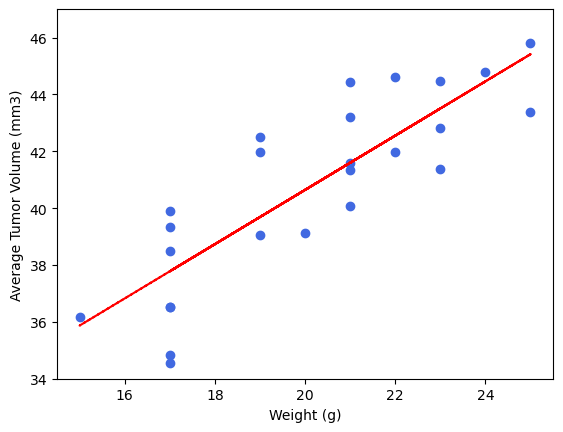

In [414]:
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(weight.astype(float),scatter_mean)
pe_fit = pe_slope * weight + pe_int

plt.scatter(weight, scatter_mean, marker="o", facecolors="royalblue", edgecolors="royalblue")
plt.plot(weight,pe_fit,"--",color='red')
plt.ylim(34,47)
plt.xlabel("Weight (g)")
plt.gca().set_ylabel('Average Tumor Volume (mm3)')
plt.show()